In [3]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import math
import matplotlib.pyplot as plt

### EXERCISE 1. 
The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

**We will use z-test because the standart deviation of population is given and sample size > 30**

In [4]:
# H0: mu0 = 13.20
# H1: mu0 < 13.20

In [5]:
n = 40  #sample size
sigma = 2.50  #STD - population
mu = 13.20  #population mean
xbar = 12.20  #sample mean

 **z_test = (xbar-μ) / (σ/sqrt(n))**

In [6]:
z_test = (xbar - mu) / (sigma / np.sqrt(n))
z_test

-2.5298221281347035

In [7]:
Zα = -2.325

In [8]:
Zα = -2.325 

if z_test < Zα:
    print("Reject the Null")
else:
    print("Fail to reject Null")

Reject the Null


Confirm with **p_value**

In [9]:
pvalue = stats.norm.cdf(z_test)
pvalue

0.005706018193000826

In [10]:
alpha = 0.01
if pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


### EXERCISE 2.
Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

In [13]:
df1 = pd.read_csv("soil.csv")
df1.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [14]:
df1.Soil1.mean()

1.6918

In [15]:
df1.Soil2.mean()

1.4171142857142858

We don't know the sigma value of the population, so t_test will be used.

In [16]:
# H0: mu1 = mu2
# H1: mu1 != mu2

In [17]:
df1.isnull().value_counts()

Soil1  Soil2
False  False    30
True   False     5
dtype: int64

In [18]:
indTest = stats.ttest_ind(df1.Soil1, df1.Soil2, nan_policy = 'omit')
indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.5932287323528147e-06)

In [20]:
indTest.pvalue

2.5932287323528147e-06

In [21]:
indTest1 = stats.ttest_ind(df1.dropna()["Soil1"], df1.dropna()["Soil2"])
indTest1

Ttest_indResult(statistic=5.134893443609085, pvalue=3.440204643633666e-06)

In [17]:
indTest1.pvalue

3.4402046436336477e-06

In [18]:
alpha = 0.01
if indTest1.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


### EXERCISE 3. 
The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.


In [19]:
pisa_df = pd.read_csv("2015_pisa.csv")

In [20]:
pisa_df.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [27]:
pisa_df.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', nan, 'AF'], dtype=object)

In [21]:
pisa_df.shape

(70, 6)

In [26]:
pisa_df.groupby("Continent_Code").describe().T

Continent_Code                        AF          AS          EU          OC  \
internet_users_per_100 count    2.000000   17.000000   37.000000    2.000000   
                       mean    43.359918   68.455613   77.274888   86.391704   
                       std      7.297226   21.086060   12.425773    2.589686   
                       min     38.200000   21.976068   53.744979   84.560519   
                       25%     40.779959   50.300000   68.632900   85.476112   
                       50%     43.359918   74.000000   76.184000   86.391704   
                       75%     45.939877   84.948353   87.479056   87.307296   
                       max     48.519836   92.884826   98.200000   88.222889   
Math                   count    2.000000   17.000000   37.000000    2.000000   
                       mean   363.212100  466.216647  477.981449  494.559750   
                       std      5.099513   64.356490   35.150403    0.938401   
                       min    359.606200  380.259000  371.311400  493.896200   
                       25%    361.409150  403.833200  464.040100  494.227975   
                       50%    363.212100  459.816000  489.728700  494.559750   
                       75%    365.015050  531.296100  503.722000  494.891525   
                       max    366.818000  564.189700  521.250600  495.223300   
Reading                count    2.000000   17.000000   37.000000    2.000000   
                       mean   355.457400  454.059682  476.164608  506.085650   
                       std      7.916909   57.048962   37.720545    4.504341   
                       min    349.859300  346.549000  351.741500  502.900600   
                       25%    352.658350  408.102200  452.514300  504.493125   
                       50%    355.457400  433.542300  487.250100  506.085650   
                       75%    358.256450  508.690500  499.814600  507.678175   
                       max    361.055500  535.100200  526.424700  509.270700   
Science                count    2.000000   17.000000   37.000000    2.000000   
                       mean   381.074250  467.945847  478.299381  511.648700   
                       std      7.536556   56.671371   34.450616    2.340241   
                       min    375.745100  386.485400  383.682400  509.993900   
                       25%    378.409675  417.611200  460.774900  510.821300   
                       50%    381.074250  456.483600  490.225000  511.648700   
                       75%    383.738825  523.277400  501.936900  512.476100   
                       max    386.403400  555.574700  534.193700  513.303500   

Continent_Code                        SA  
internet_users_per_100 count    7.000000  
                       mean    60.180494  
                       std      9.772455  
                       min     40.900000  
                       25%     57.116462  
                       50%     64.289000  
                       75%     66.321532  
                       max     69.198471  
Math                   count    7.000000  
                       mean   402.887700  
                       std     18.128894  
                       min    377.069500  
                       25%    388.102200  
                       50%    409.033300  
                       75%    417.617650  
                       max    422.671400  
Reading                count    7.000000  
                       mean   425.359229  
                       std     19.709688  
                       min    397.541400  
                       25%    416.126900  
                       50%    425.303100  
                       75%    431.922700  
                       max    458.570900  
Science                count    7.000000  
                       mean   421.747186  
                       std     18.470319  
                       min    396.683600  
                       25%    408.205450  
                       50%    424.590500  
                       75%

In [35]:
eu = pisa_df[(pisa_df["Continent_Code"] == "EU")]

In [37]:
eu.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
5,BEL,EU,85.052900,506.9844,498.5242,501.9997
6,BGR,EU,56.656300,441.1899,431.7175,445.7720
9,CHE,EU,87.479056,521.2506,492.1982,505.5058


In [40]:
asia = pisa_df[pisa_df["Continent_Code"] == "AS"]
asia.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
11,CHN,AS,50.300000,531.2961,493.9412,517.7793
25,GEO,AS,47.569760,403.8332,401.2881,411.1315
27,HKG,AS,84.948353,547.9310,526.6753,523.2774
30,IDN,AS,21.976068,386.1096,397.2595,403.0997


In [46]:
asia.Math.mean()

466.2166470588236

In [47]:
eu.Math.mean()

477.98144864864867

In [48]:
asia.Math.isnull().sum()

0

In [49]:
eu.Math.isnull().sum()

0

In [51]:
eu.Math.mean() - asia.Math.mean()


11.764801589825083

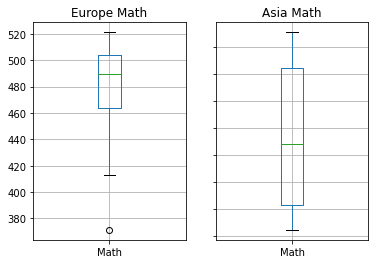

In [72]:
fig, ax = plt.subplots(nrows=1,ncols=2)
eu.Math.plot(kind = "box", ax = ax[0],title = "Europe Math",grid = True);
asia.Math.plot(kind = "box", ax = ax[1],title = "Asia Math",grid = True,sharey = True);




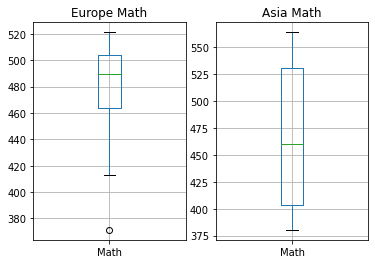

In [73]:
fig, ax = plt.subplots(nrows=1,ncols=2)
eu.Math.plot(kind = "box", ax = ax[0],title = "Europe Math",grid = True);
asia.Math.plot(kind = "box", ax = ax[1],title = "Asia Math",grid = True,sharey = False);




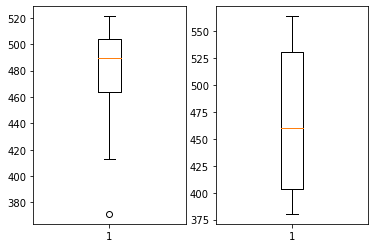

In [84]:
plt.subplot(1,2,1)
plt.boxplot(eu.Math);
plt.subplot(1,2,2)
plt.boxplot(asia.Math);

In [85]:
eu.Math.describe()

count     37.000000
mean     477.981449
std       35.150403
min      371.311400
25%      464.040100
50%      489.728700
75%      503.722000
max      521.250600
Name: Math, dtype: float64

In [86]:
eu[eu.Math == eu.Math.min()]

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
46,MKD,EU,70.3802,371.3114,351.7415,383.6824


### EXERCISE 4.
The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.

In [87]:
student = pd.read_csv("students_2014 - students_2014.csv")

In [88]:
student.head()

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,NaN,NaN,NaN,NaN,0.0,0,72.35,NaN,...,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278,1/1/1995,NaN,NaN,NaN,Philosophy,0.0,0,70.66,179.20,...,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389,12/31/1994,NaN,NaN,NaN,NaN,0.0,0,70.68,198.52,...,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820,12/1/1994,NaN,NaN,NaN,business administration,1.0,0,NaN,198.34,...,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559,11/10/1994,NaN,NaN,NaN,NaN,1.0,1,67.43,128.17,...,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0


In [90]:
eng_mean = student.English.mean()
eng_mean


82.78755501222493

In [92]:
math_mean = student.Math.mean()
math_mean

65.46800947867297

In [96]:
student.Math.isnull().sum()

13

In [97]:
student.English.isnull().sum()

26

In [110]:
ttest_rel = stats.ttest_rel(student.dropna()["English"], student.dropna()["Math"])
ttest_rel

Ttest_relResult(statistic=12.29684530879902, pvalue=5.160461862831768e-17)

In [ ]:
# H0 matematik ve ingilizce notları arasında anlamlı fark yok 
# HA matematik ve ingilizce notları arasında anlamlı fark vardır.

In [113]:
alpha = 0.05
if ttest_rel.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null
